What are the most optimal skill to learn for Data Analysts?

Methology

     1. Group skills to determine median salary and likelihood of being in posting
     2. Visualize median salary vs percent skill demand 
     3. (Optional) Determine if certain technologies are more prevalent

In [51]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Corrected variable name
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [52]:
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

In [53]:
df_DA_US = df_DA_US.dropna(subset = ["salary_year_avg"])

df_DA_US_explode = df_DA_US.explode("job_skills")

df_DA_US_explode[["salary_year_avg","job_skills"]].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [55]:
df_DA_skills = df_DA_US_explode.groupby("job_skills")["salary_year_avg"].agg(["count","median"]).sort_values(by = "count",ascending = False)

df_DA_skills = df_DA_skills.rename(columns ={"count":"skill_count","median": "median_salary"})
df_job_count = len(df_DA_US)
df_DA_skills["skill_percent"] = df_DA_skills["skill_count"] / df_job_count * 100
skill_percent = 5
df_DA_skills_high_demand = df_DA_skills[df_DA_skills["skill_percent"] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


<Figure size 1200x800 with 0 Axes>

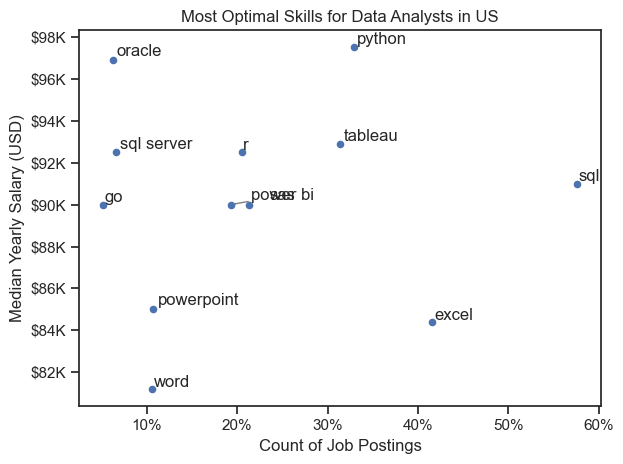

In [57]:
from adjustText import adjust_text

plt.figure(figsize=(12,8))

df_DA_skills_high_demand.plot(kind = "scatter", x= "skill_percent",y="median_salary")

texts = []
for i,txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand["skill_percent"].iloc[i],df_DA_skills_high_demand["median_salary"].iloc[i],txt))

adjust_text(texts,arrowprops=dict(arrowstyle="->",color = "gray"))    

plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Salary (USD)")
plt.title("Most Optimal Skills for Data Analysts in US")

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))

plt.tight_layout()
plt.show()


In [45]:
df_technology = df["job_type_skills"].copy()

df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()

technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] +=value
        else:
            technology_dict[key] = value

for key,value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['sheets',
  'nuix',
  'ssrs',
  'ms access',
  'esquisse',
  'sharepoint',
  'datarobot',
  'alteryx',
  'outlook',
  'dax',
  'cognos',
  'sas',
  'powerpoint',
  'qlik',
  'msaccess',
  'spss',
  'power bi',
  'word',
  'microstrategy',
  'sap',
  'spreadsheet',
  'splunk',
  'excel',
  'tableau',
  'looker',
  'ssis',
  'visio',
  'powerbi'],
 'programming': ['erlang',
  'perl',
  'pascal',
  'solidity',
  'python',
  'lua',
  'swift',
  'assembly',
  'vb.net',
  'html',
  'objective-c',
  'crystal',
  'css',
  'golang',
  'c++',
  'sas',
  'ruby',
  'javascript',
  'vba',
  'dart',
  'visualbasic',
  'go',
  'visual basic',
  'sql',
  'ocaml',
  'php',
  'shell',
  'mongo',
  'rust',
  'elixir',
  'lisp',
  'c',
  'r',
  'bash',
  'java',
  'nosql',
  'typescript',
  'powershell',
  'scala',
  'c#',
  't-sql',
  'apl',
  'kotlin',
  'f#',
  'julia',
  'groovy',
  'cobol',
  'matlab',
  'sass',
  'haskell',
  'delphi',
  'no-sql',
  'mongodb',
  'clojure',
  'fort

In [46]:
df_technology = pd.DataFrame(list(technology_dict.items()),columns = ["Technology","skills"])

df_technology = df_technology.explode('skills')
df_technology

,Technology,skills
0,analyst_tools,sheets
0,analyst_tools,nuix
0,analyst_tools,ssrs
0,analyst_tools,ms access
0,analyst_tools,esquisse
...,...,...
9,sync,symphony
9,sync,webex
9,sync,mattermost
9,sync,unify


In [47]:
df_plot = df_DA_skills_high_demand.merge(df_technology,left_on  = "job_skills",right_on = "skills")
df_plot

,skill_count,median_salary,skill_percent,Technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


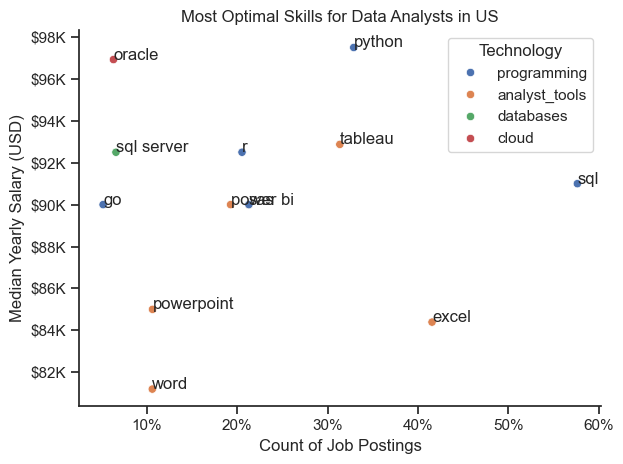

In [48]:
from adjustText import adjust_text

#df_DA_skills_high_demand.plot(kind = "scatter", x= "skill_percent",y="median_salary")
sns.scatterplot(
    data = df_plot,
      x="skill_percent",
      y="median_salary",
      hue="Technology"
      )

sns.set_theme(style = "ticks")
sns.despine()

texts = []
for i,txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand["skill_percent"].iloc[i],df_DA_skills_high_demand["median_salary"].iloc[i],txt))

#adjust_text(texts,arrowprops=dict(arrowstyle="<-",color = "gray"),    
   # force_points=0.5,  # push labels away from points
    #force_text=0.5,    # reduce text clustering
   # expand_points=(2, 2),  # more space around points
   # expand_text=(2, 2)  ,
    #ont_size = -12,
    #rotation = -360,
   # only_move = {"point":"y","text":"ax"}# more space around labels
#)    
#plt.text(row["skill_percent"], row["median_salary"], i, fontsize=8, rotation=30)

plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Salary (USD)")
plt.title("Most Optimal Skills for Data Analysts in US")

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))

plt.tight_layout()
plt.show()


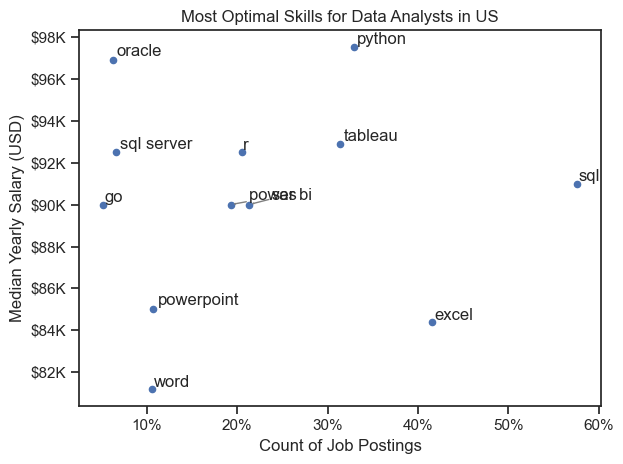

In [49]:

df_DA_skills_high_demand.plot(kind = "scatter", x= "skill_percent",y="median_salary")

texts = []
for i,txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand["skill_percent"].iloc[i],df_DA_skills_high_demand["median_salary"].iloc[i],txt))

adjust_text(texts,arrowprops=dict(arrowstyle="->",color = "gray"))    

plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Salary (USD)")
plt.title("Most Optimal Skills for Data Analysts in US")

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))

plt.tight_layout()
plt.show()